# Market Breath Backtest

In [1]:
import yfinance as yf
import pandas as pd

/Users/bichengwang/Documents/codes/python-notebook/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:


import pandas as pd
import numpy as np
import os
from tabulate import tabulate

def tabulate_printer(dic):
    return "\n{}".format(tabulate(
        [[k,v] for k, v in dic.items()], 
        headers=['Key', 'Value'], tablefmt='grid'))

def loader(ticker='^GSPC', start='1970-01-01', end='2024-05-15'):
    file_path = '/Users/bichengwang/Documents/codes/python-notebook/data/finance/{} {} {}.csv'.format(
        ticker.upper(),
        start,
        end,
    )
    if os.path.exists(file_path):
        print("File exists!")
        return pd.read_csv(file_path)
    # Download historical data for S&P 500
    df = yf.download(ticker, start=start, end=end)
    # Save the data to a CSV file
    df.to_csv(file_path)
    return df

In [3]:
spx = loader()
# Now df contains your data with the 'date' column parsed as datetime objects
spx.head()

File exists!


,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-01-02,0.0,93.540001,91.790001,93.000000,93.000000,8050000
1,1970-01-05,0.0,94.250000,92.529999,93.459999,93.459999,11490000
2,1970-01-06,0.0,93.809998,92.129997,92.820000,92.820000,11460000
3,1970-01-07,0.0,93.379997,91.930000,92.629997,92.629997,10010000
4,1970-01-08,0.0,93.470001,91.989998,92.680000,92.680000,10670000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


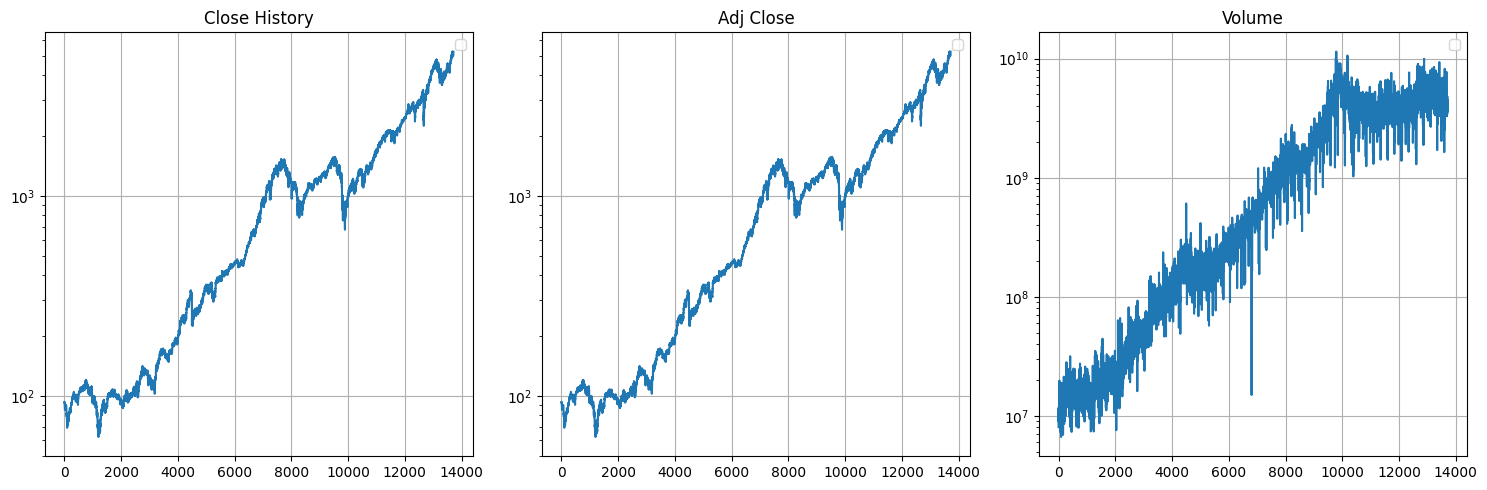

In [4]:
import matplotlib.pyplot as plt

def plot(ticker_df):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(ticker_df['Close'])
    axs[0].set_yscale('log')
    axs[0].set_title("Close History")
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(ticker_df['Adj Close'].values)
    axs[1].set_yscale('log')
    axs[1].set_title("Adj Close")
    axs[1].legend()
    axs[1].grid(True)
    axs[2].plot(ticker_df['Volume'])
    axs[2].set_yscale('log')
    axs[2].set_title("Volume")
    axs[2].legend()
    axs[2].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Show the plot
    plt.show()

plot(spx)